In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

2024-08-04 12:46:23.781921: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 12:46:23.789512: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 12:46:23.811235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 12:46:23.844926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 12:46:23.854883: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-04 12:46:23.881938: I tensorflow/core/platform/cpu_feature_gu

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

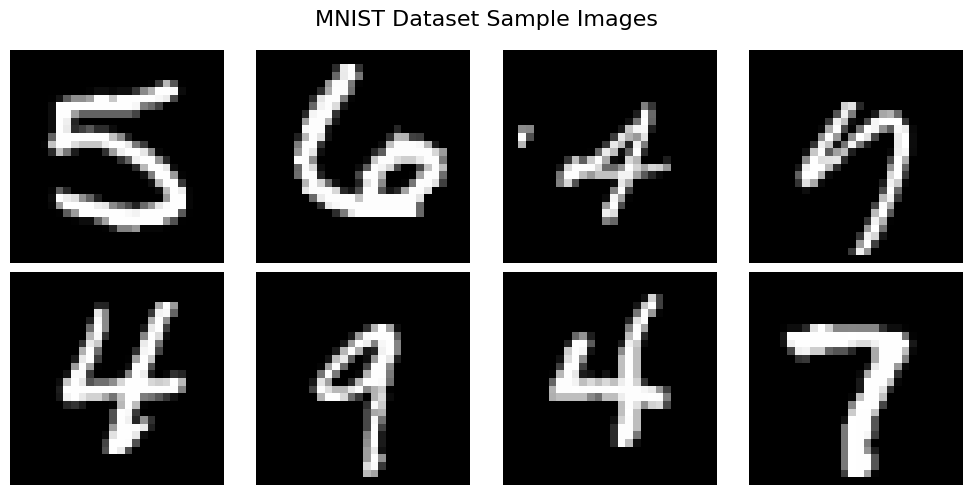

In [5]:
rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(10, 5))

# for i in range(rows):
#     for j in range(cols):
#         index = j + (cols * i)
#         # print(index)
#         axes[i, j].imshow(train_images[index], cmap='gray')
#         axes[i, j].axis('off')

for i in range(rows):
    for j in range(cols):
        index = random.randint(0, train_images.shape[0] - 1)
        # print(index)
        axes[i, j].imshow(train_images[index], cmap='gray')
        axes[i, j].axis('off')


fig.suptitle("MNIST Dataset Sample Images", fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
class Neuron:
    def __init__(self, activation):
        self.activation = activation

    def setActivation(self, num):
        self.activation = num

    def getActivation(self):
        return self.activation

#Getting the max value from an array of neurons
def getMax(l):
    max = l[0].getActivation()
    for i in range(1, l.size):
        if l[i].getActivation() > max:
            max = l[i].getActivation()
    return max    

def fillFirstLayer(l, data, index):
    for i in range(28):
        for j in range(28):
            l = np.append(l, Neuron(data[index][i][j]))

    return l
    
def fillLayerWithZeroNeurons(l, num):
    for i in range(num):
        l = np.append(l, Neuron(0))

    return l

In [7]:
# layer 1 will be composed of the pixel values of the image inputted
l1 = np.array([])

# layers 2-3 will be the 'hidden layers' or 'black box' of the network
l2 = np.array([])
l3 = np.array([])

# layer 4 will be the output layer or the head

l4 = np.array([])

l1 = fillFirstLayer(l1, train_images, 0)
l2 = fillLayerWithZeroNeurons(l2, 16)
l3 = fillLayerWithZeroNeurons(l3, 16)
l4 = fillLayerWithZeroNeurons(l4, 10)

In [11]:

l1Weights = np.array([])

for i in range(l1.size):
    temp = np.array([])
    for j in range(l2.size):
        temp = np.append(temp, np.random.uniform(-5, 5))
    l1Weights = np.append(l1Weights, temp)    

print(l1Weights.shape)

l2Weights = np.array([])

for i in range(l2.size):
    temp = np.array([])
    for j in range(l3.size):
        temp = np.append(temp, np.random.uniform(-5, 5))
    l2Weights = np.append(l2Weights, temp)    

print(l2Weights.shape)

l3Weights = np.array([])

for i in range(l3.size):
    temp = np.array([])
    for j in range(l4.size):
        temp = np.append(temp, np.random.uniform(-5, 5))
    l3Weights = np.append(l3Weights, temp) 

print(l3Weights.shape)

l2Biases = np.array([])
l3Biases = np.array([])
l4Biases = np.array([])

for i in range(16):
    l2Biases = np.append(l2Biases, np.random.uniform(-10, 10))
    l3Biases = np.append(l3Biases, np.random.uniform(-10, 10))
    if i < 10:
        l4Biases = np.append(l4Biases, np.random.uniform(-10, 10))





print(l1Weights.size + l2Weights.size + l3Weights.size + l2Biases.size + l3Biases.size + l4Biases.size)

(12544,)
(256,)
(160,)
13002


In [ ]:
# Now we have the network fully set up.
# We have 4 layers of neurons
# 13002 parameters (weights and biases) with the weights being randomized between [-5, 5] and the biases randomized between [-10, 10]
# The 1st layer already has the values of the 1st image and the 2-4th layers all contain neurons initialized at 0